In [6]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline
import matplotlib as mpl
mpl.rc("savefig", dpi=100)

SSRO calibration :  20170228/172427
max. F = (95.67 +/- 0.41)% at t=7 us
	ms_0 = (94.02 +/- 0.34)%
	ms_1 = (97.32 +/- 0.23)%


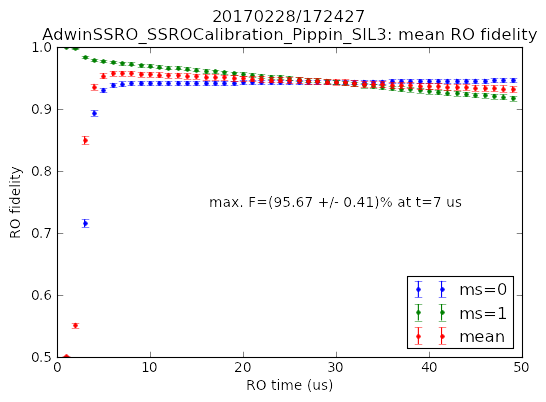

In [78]:
reload(ssro)
ssro.ssrocalib(plot_photon_ms0=False)
# print 'Threshold is 96.6'

ms0 0
msp1 1
msm1 -1
SSRO calibration :  20170227/165224
max. Fm = (96.49 +/- 0.36)% at t=6 us
	ms_0 = (94.04 +/- 0.33)%
	ms_1 = (98.94 +/- 0.14)%
max. Fp = (96.85 +/- 0.34)% at t=6 us
	ms_0 = (94.04 +/- 0.33)%
	ms_1 = (99.66 +/- 0.08)%
Job's done!


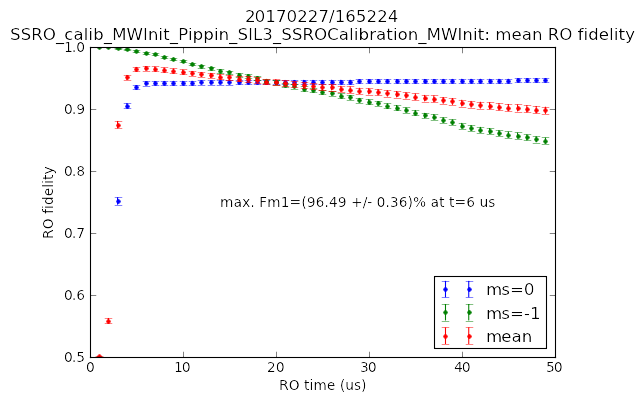

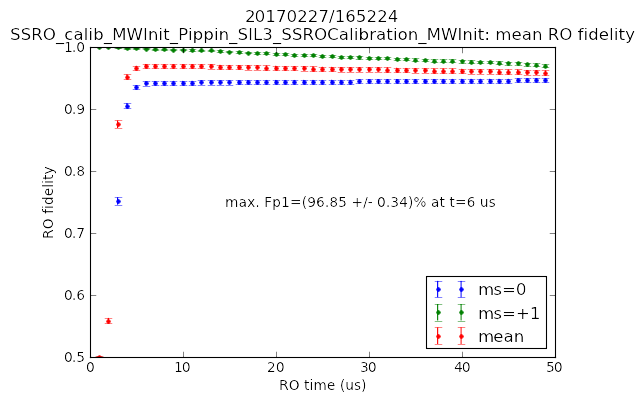

In [13]:
reload(ssro)
ssro.ssrocalib_MWInit(plot_photon_ms0=False)

# DARKESR

d:\measuring\data\20170228\183529_PulsarDarkESR_Pippin_SIL3
Converged with chi squared  0.0822612580976
degrees of freedom, dof  146
RMS of residuals (i.e. sqrt(chisq/dof))  0.023736749454
Reduced chisq (i.e. variance of residuals)  0.000563433274641

fitted parameters at minimum, with 68% C.I.:
 0 a              1.009204 +/-   0.002724
 1 A              0.118675 +/-   0.010679
 2 sigma          0.000162 +/-   0.000012
 3 x0             4.057718 +/-   0.000027
 4 s1             0.002195 +/-   0.000009

correlation matrix:
               a         A         sigma     x0        s1        
         a  1.000000
         A  0.488297  1.000000
     sigma  0.311939 -0.340415  1.000000
        x0  0.457836  0.754761 -0.091839  1.000000
        s1  0.000000  0.000700 -0.000871  0.000000  1.000000



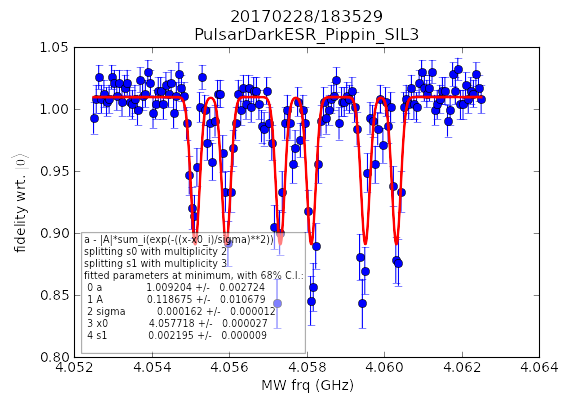

In [62]:
execfile(r'D:\measuring\analysis\scripts\espin\dark_esr_analysis_purification.py')

# Pi pulses

d:\measuring\data\20170228\230826_Pi_Calibration_Pippin_SIL3Pi
[ 0.0795  0.068   0.052   0.043   0.032   0.0325  0.032   0.037   0.0495
  0.0525  0.0615  0.0795]
min x =  0.624545454545
min y = 0.000879314134975
[ 0.0795  0.068   0.052   0.043   0.032   0.0325  0.032   0.037   0.0495
  0.0525  0.0615  0.0795]
min x =  0.624545454545
min y = 0.000879314134975
fitted infidelity 0.00193906410177
Fitted minimum at  0.63003255057


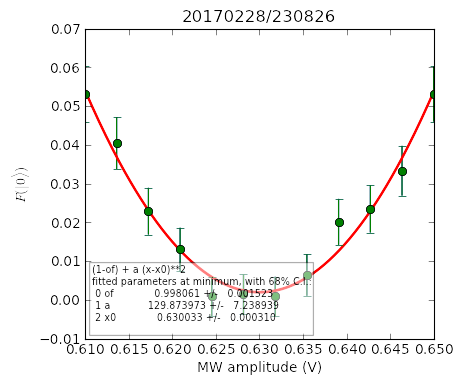

In [80]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi_Calibration')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.fit_parabolic(folder, x0_guess=0.44,a_guess=0,of_guess=0, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
#ax.set_ylim(0,1.)
print 'fitted infidelity', 1-fit['params'][0]
print 'Fitted minimum at ', fit['params'][2]

# Pi/2

[ 0.388  0.412  0.436  0.46   0.484  0.508  0.532  0.556  0.58   0.604
  0.628]
Converged with chi squared  0.00272747248353
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0174084030908
Reduced chisq (i.e. variance of residuals)  0.00030305249817

fitted parameters at minimum, with 68% C.I.:
 0 m             -2.526779 +/-   0.069159
 1 x0             0.459320 +/-   0.002468

correlation matrix:
               m         x0        
         m  1.000000
        x0 -0.539900  1.000000



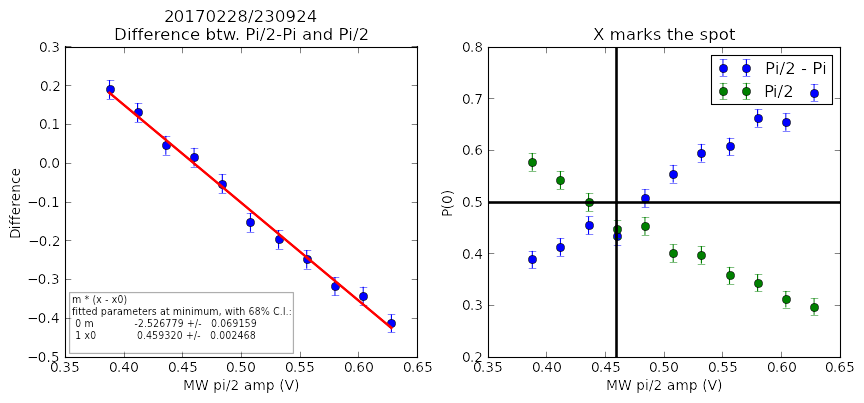

In [81]:
execfile(r'D:\measuring\analysis\scripts\espin\calibration_pi2_CORPSE.py')

#Electron T1

Converged with chi squared  0.00831866431319
degrees of freedom, dof  12
RMS of residuals (i.e. sqrt(chisq/dof))  0.0263291098615
Reduced chisq (i.e. variance of residuals)  0.000693222026099

fitted parameters at minimum, with 68% C.I.:
 0 A              0.743431 +/-   0.016103
 1 tau        52718.387435 +/- 2776.258829

correlation matrix:
               A         tau       
         A  1.000000
       tau -0.762833  1.000000

minimal point: 50000.0


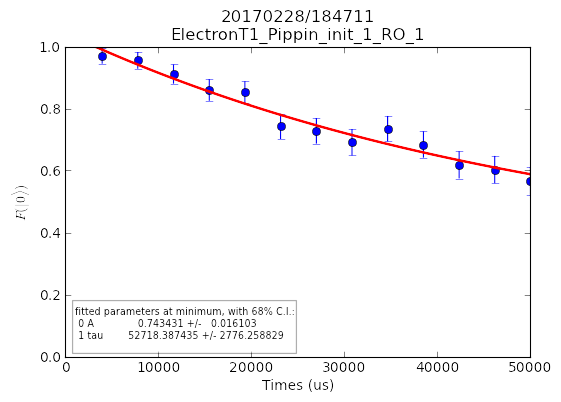

In [77]:
### no RO correction
from analysis.lib.fitting import fit
folder= tb.latest_data('1_RO')
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
a.get_electron_ROC()
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.0,1.0)
y = a.p0
p0,fitfunc,fitfunc_str = common.fit_exp_decay_with_offset(0.3,0.7,50e3)
fit_result = fit.fit1d(a.sweep_pts,y,None,p0=p0,fitfunc=fitfunc,do_print=True,fixed=[0],ret=True)
plot.plot_fit1d(fit_result,np.linspace(a.sweep_pts[0],a.sweep_pts[-1],100),ax=ax,plot_data=False)
print 'minimal point:',a.sweep_pts[np.argmin(a.normalized_ssro)]

# PM Sweep

[ 0.928  0.927  0.908  0.901  0.917  0.916  0.752  0.495  0.365  0.139
  0.089  0.077  0.058  0.059  0.059  0.07   0.056  0.064  0.064  0.054]
min x =  40.0
min y = 0.0421007867319


(0, 1.0)

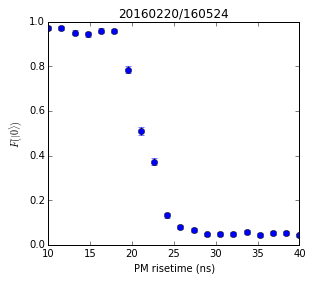

In [9]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('PMrisetime')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
#fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(0,1.)

# Theta pulse

d:\measuring\data\20160824\130325_Pi_Calibration_Pippin_SIL2theta
[ 0.3792  0.3798  0.367   0.3578  0.3428  0.3368  0.3224  0.316   0.2964
  0.312   0.2992  0.2778]
min x =  0.635
min y = 0.291577597264


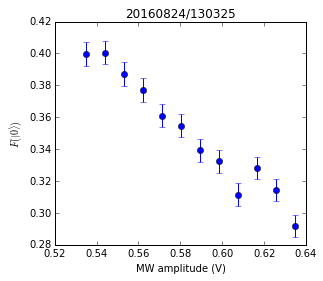

In [3]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('theta')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#ax.set_ylim(0.2,0.35)